# Table of contents

- Introduction
- Step 1: Import libraries
- Step 2: Import data
- Step 3: Exploratory data analysis
    - 3a: Statistical
    - 3b: Visual
        - i: Survived
        - ii: Pclass  
        - iii: Age
        - iv: SibSp & Parch
        - v: Fare
- Step 4: Data preprocessing: 
    - 4a: Converting features
        - i: Ticket
        - ii: Fare
        - iii: Sex
        - iv: Embarked
        - v: Name
    - 4b: Missing data
        - i: Cabin
        - ii: Age
    - 4c: Creating new features
        - SibSp & Parch
    - 4d: A final look
- Step 5: Machine learning models
    - 5a: K nearest neigbours
    - 5b: Logistics regression
    - 5c: Random forest
    - 5b: Support vector machine
    - 5e: Decision tree
    - 5f: The most accurate algorithm: Random Forest
    - 5g: K folds cross validation on Random Forest
- Step 6: Assessing feature importance
- Step 7: Hyperparameter tuning
- Step 8: Further model evaluation
    - 8a: Confusion matrix
    - 8b: Precision & recall
    - 8c: F1 score
    - 8d: Precision & recall curve
    - 8e: ROC curve
    - 8f: ROC-AUC score
- Step 9: Submission
- Step 10: Summary

# Introduction

In this, my first Data Science project, I will be working on the very famous Titanic dataset. This dataset provides information on the fate of each passenger on board the vessel when it tragically sank on its maiden voyage in 1912. Alongside this data is further information about each individual including age, sex, ticket type and cabin. This dataset derives from a Kaggle competition, whereby the challenge is to build a predictive model to determine whether or not an individual would have survived.

I will be conducting an end-to-end machine learning project in attempt to solve this challenge. I will aim throughout to explain each step in detail so that other beginners reading this can follow and understand the logic behind each action. It could also enable more experienced readers to point out any inefficiencies in my code, or areas in which additional value could be added to my model. Or, to the reader who merely has an interest, I hope to tell an interesting story about this data. Enjoy!

# Step 1: Import libraries

I will firstly begin by importing every library that will be used at somepoint throughout this project. 

In [10]:
# Every library that will be used in this project is imported at the start.

# Data handling and processing
import pandas as pd
import numpy as np

# Data visualisation & images
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# Pipeline and machine learning algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Model fine-tuning and evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from time import time
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Step 2: Import data

The dataset is split into two separate files, a train file and a test file. It is best practice to avoid using the full dataset at the data analysis/exploration stage, and to instead focus on solely the train-set, keeping the test-set to one side. This prevents the model being adjusted to fit the test-set, which is unfavourable since the aim is to build a model that can predict accurately on data that it has never seen before. The test-set can then be re-introduced to test model accuracy when exploring different machine learning algorithms. For the purpose of the Kaggle competition, it is the test-set that will be finally submitted, containing a prediction of 'survived' or 'not survived' for each individual.

In [11]:
# Data downloaded from Kaggle as a .csv file and read into this notebook from my local directory.
train = pd.read_csv('/Users/josh24990/Documents/Personal Development/3. Data Science/Python/Titanic Data/train.csv')
test = pd.read_csv('/Users/josh24990/Documents/Personal Development/3. Data Science/Python/Titanic Data/test.csv')

# Step 3a: Exploratory data analysis (statistical)

Before we get stuck into any feature engineering, and certainly before we start building models it is a good idea to get more familiar with the contents of the dataset. This includes retrieving information on column contents, data types and whether missing or erroneous values are present. This is what we'll do next.

In [12]:
# Return key characteristics of the dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


Printing the Dataframe 'info' reveals 891 entries in total, which we know equates to passengers. Most columns contain the full set of data, although some do feature missing values; Age and Cabin. We will need to assess these more closely and take appropriate action at the data preprocessing stage. Looking at data types, there are 5 objects, 5 integers and 2 floats. Lastly, the target variable is contained within the 'Survived' column, leaving the remaining 11 columns as our feature variables. To provide further information on what each column actually refers to:

<b> - PassengerId:</b> The unique identifier in this Data file <br>
<b> - Survived:</b>    The fate of each passenger (target) <br>
<b> - Pclass:</b>      The ticket class <br>
<b> - Name:</b>       The passenger name <br>
<b> - Sex:</b>         The passenger sex <br>
<b> - Age:</b>         The passenger age in years   
<b> - Sibsp:</b>       The number of siblings/spouses also travelling <br>
<b> - Parch:</b>       The number of parents/children also travelling <br>
<b> - Ticket:</b>      The passenger ticket number <br>
<b> - Fare:</b>        The passenger fare <br>
<b> - Cabin:</b>       The passenger cabin number <br>
<b> - Embarked:</b>    The passenger's port of Embarkation <br>

In [13]:
# Print the first 5 rows of the train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This reveals more about the structure of the dataset and ways in which each feature has been recorded.

In [14]:
# Returning descriptive statistics of the train dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Every column that is either an int or a float can be 'described', leaving all objects omitted. Taking the mean value of the 'Survived' column, it becomes clear that <b>38%</b> of passengers within the training survived when the Titanic sank. From these statistics and after inspecting the data head, we can start to learn more about which actions might be required at the Data Preprocessing stage: <br>
1. Features currently stored as objects will require converting to numeric values. Otherwise, the machine learning algorithms will be unable to process them. <br>
2. Features containing NaN values ('not a number') will need dealing with in order to again make the feature compatible for maching learning algorithms. Imputing may come in handy at this stage. <br>
3. The features vary significantly in range. This is denoted by the standard deviation which provides a measure of data spread. The min and max also provide a useful indication of this. For the purposes of building certain predictive models, some of these ranges will require normalising so that they fit a roughly identical scale. Age and Fare look like two candidates for normalisation at this stage.
4. Some features could be more useful within a predictive model if they are combined, for example 'SibSp' and 'Parch' maybe provide more value as a single feature.

To understand a little more around how much data is actually missing, the final step before some more visual EDA is conducted will be to inspect per feature the quantity of missing values:

In [15]:
# Provide NaN count for each feature in the dataset
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


This reveals three features (Age, Cabin and Embarked) that will require further attention when at the Data Preprocessing stage.

# Step 3b: Exploratory data analysis (visual)

Before proceeding with any graphical visualisation, let's see whether a correlation matrix can provide further insight into which features may be associated with survival on the Titanic.

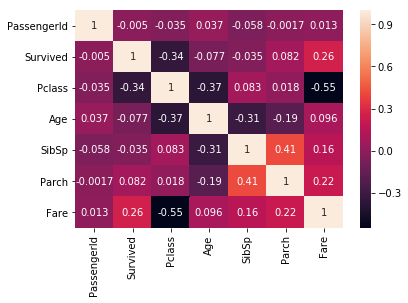

In [16]:
# Correlation matrix of all numeric features
sns.heatmap(train.corr(), annot = True)

Perhaps not the most insightful view at this stage given that some features are pending preprocessing, however a visible correlation does exist between Survived and Pclass and Fare. Age, SibSp & Parch would also seem like logical predictors and it would be expected that after these variables have been preprocessed their correlation to Survived will increase. PassengerID appears less useful with a tiny negative correlation of -0.005. With no preprocessing required for this feature, it's usefulness will not improve and it will therefore be dropped from the dataset.

In [17]:
# Dropping PassengerID
train = train.drop(['PassengerId'], axis=1)

With PassengerID dropped, this leaves the following numeric features available for visual EDA:
1. Survived (the target)
2. Pclass
3. Age
4. SibSp
5. Parch
6. Fare

## i: Survived

0    549
1    342
Name: Survived, dtype: int64


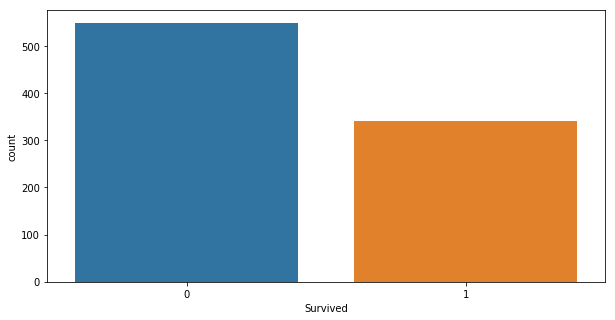

In [18]:
# Plot graph of Survived count and provide this numerically too
fig = plt.figure(figsize = (10,5))
sns.countplot(x='Survived', data = train)
print(train['Survived'].value_counts())

A quick inspection into the survived feature reveals that as before seen, 38% of passengers within the training set survived when the Titanic sank. This equates to 342 passengers out of 891 in total.

## ii: Pclass

In [19]:
# Count of each Pclass type
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5,1,'Percentage Survived by Ticket Class')

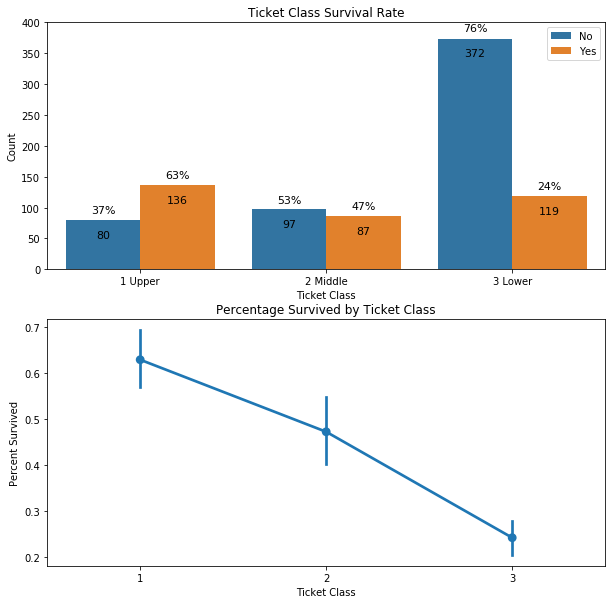

In [20]:
# Bar chart of each Pclass type
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
ax1 = sns.countplot(x = 'Pclass', hue = 'Survived', data = train)
ax1.set_title('Ticket Class Survival Rate')
ax1.set_xticklabels(['1 Upper','2 Middle','3 Lower'])
ax1.set_ylim(0,400)
ax1.set_xlabel('Ticket Class')
ax1.set_ylabel('Count')
ax1.legend(['No','Yes'])

# Code to display data labels on the bar chart
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax1.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax1.patches): 
    ax1.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
            '{:1.0%}'.format(height[i]/total[i]), ha="center", size=11)
    ax1.text(p.get_x()+p.get_width()/2, height[i]*1.01 - 30,
           '{:.0f}'.format(height[i]), ha="center", size=11)

# Pointplot Pclass type
ax2 = plt.subplot(2,1,2)
sns.pointplot(x='Pclass', y='Survived', data=train)
ax2.set_xlabel('Ticket Class')
ax2.set_ylabel('Percent Survived')
ax2.set_title('Percentage Survived by Ticket Class')

Confirmation of what was seen in the correlation matrix that a trend is visible between ticket class and survival chance. The higher class ticket, the more likely one is to have survived. This will become a very handy predictor in the machine learning algorithm.

## iii. Age

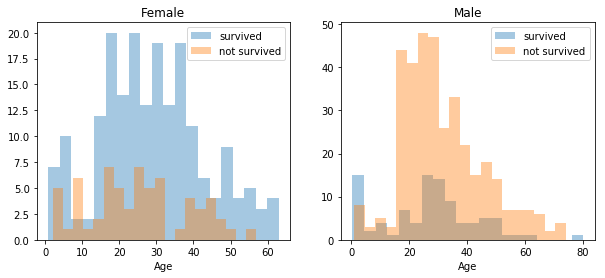

In [21]:
# Bar chart of age mapped against sex. For now, missing values have been dropped and will be dealt with later
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

More can be understood about age when plotted by sex. These graphs reveal that overall women were much more likely to survive than men, and this is largely regardless of age. For both sexes, it appears that chances of survival are more likely at a younger age, which is what might have been expected. From the age of 20, it was consistently more likely that men would not have survived, up until their age approached 80. For women, apart from a potentially anomalous finding around the 8-9 bracket, they were always more likely to survive.

## iv. SibSp & Parch

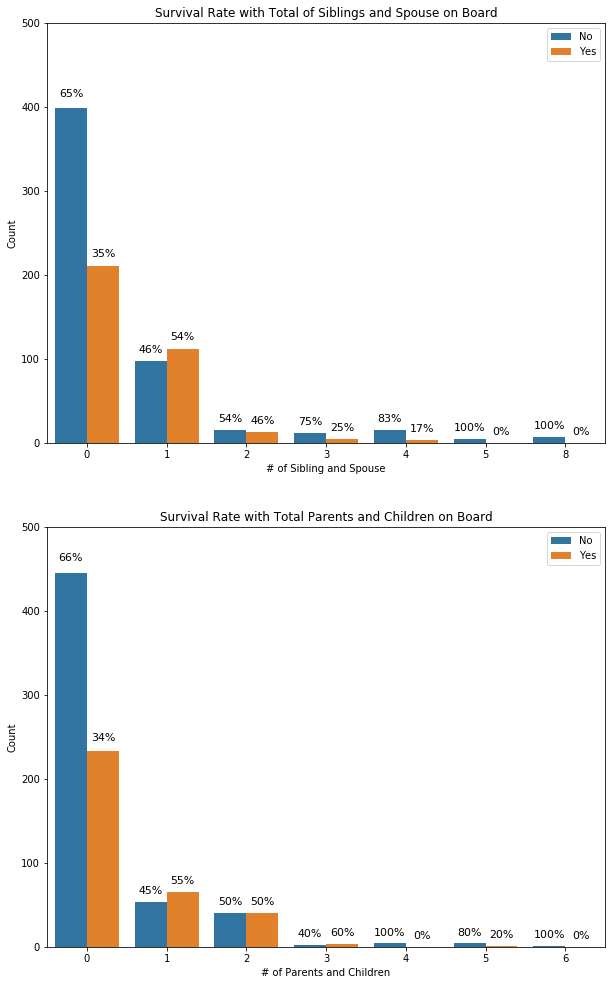

In [22]:
# Plotting survival rate vs Siblings or Spouse on board
fig = plt.figure(figsize = (10,17))
ax1 = plt.subplot(2,1,1)
ax1 = sns.countplot(x = 'SibSp', hue = 'Survived', data = train)
ax1.set_title('Survival Rate with Total of Siblings and Spouse on Board')
ax1.set_ylim(0,500)
ax1.set_xlabel('# of Sibling and Spouse')
ax1.set_ylabel('Count')
ax1.legend(['No','Yes'],loc = 1)

# Adding data labels to graph
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax1.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax1.patches): 
    ax1.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=11)

# Plotting survival rate vs Parents or Children on board
ax2 = plt.subplot(2,1,2)
ax2 = sns.countplot(x = 'Parch', hue = 'Survived', data = train)
ax2.set_title('Survival Rate with Total Parents and Children on Board')
ax2.set_ylim(0,500)
ax2.set_xlabel('# of Parents and Children')
ax2.set_ylabel('Count')
ax2.legend(['No','Yes'],loc = 1)

# Adding data labels to graph
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax2.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax2.patches): 
    ax2.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=11)

Not surprisingly, the structure of these two graphs appear similar, with a similar density of passengers featured within each count, with also a similar ratio of survived vs not survived. This adds further rationale for these two features to be combined, which will be performed at the Data Preprocessing stage.

## v. Fare

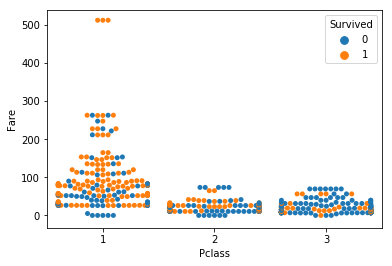

In [23]:
# Graph to display fare paid per the three ticket types
sns.swarmplot(x="Pclass", y="Fare", data=train, hue='Survived')

Fare has been displayed per ticket type, and it doesn't reveal too many differences between Pclass 2 and 3, but it does between these and Pclass 1. Those in Pclass 1 appear to on average have paid more to be on board the titanic, and as we have previously seen, also had a greater chance of survival.

# Step 4: Data Preprocessing

Now that we have familiarised ourselves with the current numerical data, work can begin on getting each feature prepared for machine learning application. This will involve the actions discussed during step 3a (statistical EDA). This is perhaps one of, if not the most step in buildng a machine learning model as ultimately feature quality will determine the usefulness of any resulting model that is built. So let's get to it! A quick recap of the data to begin with:

In [24]:
# Recapping the features available within the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [25]:
# Recapping the features within the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Inspection of the test-set reveals one missing value within Fare, so we will need to fix this!

## 4a: Converting features

Converting all current objects and floats into numeric values (int). I will start with the simple amendments before progressing to the features where greater work is required.

### i: Ticket

In [26]:
# Getting information on ticket
train['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

There are 681 unique records within the ticket feature training dataset. It's unlikely that we'll be able to complete any meaningful conversion with this feature, so it will be dropped from the dataset.

In [27]:
# Dropping ticket from dataset
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

### ii: Fare

In [28]:
# Converting Fare to type int and also fixing the 1 missing value in the test set
data = [train, test]

for d in data:
    d['Fare'] = d['Fare'].fillna(0)
    d['Fare'] = d['Fare'].astype(int)

### iii: Sex

In [29]:
# Recoding sex to numeric values with use of a dictionary for machine learning model compatibility
genders = {"male": 0, "female": 1}
data = [train, test]

for d in data:
    d['Sex'] = d['Sex'].map(genders)

### iv: Embarked

In [30]:
# Information on Embarked
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Before we progress with any conversion, the two missing values can be quickly fixed by replacing the NaN with the most frequently embarked value: S.

In [31]:
# Pulling out most popular port
mode = 'S'
data = [train, test]

# Replacing missing values with most common port
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(mode)

Next, the values within embarked will be convered into ints for machine learning compatibility

In [32]:
# Converting embarked to numeric values: 0, 1, 2
port = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(port)

### v: Name

In [33]:
# Inspecting the first five rows of Name
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

The names as they are will not be helpful to us, however meaningful information can be found in the titles, providing additional information on gender and age. Therefore, these will be extracted and used to form a new feature: Title. Once created, Name can be dropped from the dataset. A few new functions will enable us to complete this operation.

In [34]:
# New function to return name title only
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [35]:
# Creating two lists of titles, one for each dataset
titles_train = sorted(set([x for x in train['Name'].map(lambda x: get_title(x))]))
titles_test = sorted(set([x for x in test['Name'].map(lambda x: get_title(x))]))

To understand better what we are now working with, the list size and values will be printed below.

In [36]:
# Printing list length and items in each list
print(len(titles_train), ':', titles_train)
print(len(titles_test), ':', titles_test)

17 : ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']
9 : ['Col', 'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev']


17 unique title values is perhaps beyond the scope of what we want to achieve with title. We could also account for status however with Pclass we can already get a good indication of that. Instead, these values will be converted into four categories: 'Mr', 'Mrs', 'Miss', 'Master'. The below function will achieve this.

In [37]:
# New function to classify each title into 1 of 4 overarching titles
def adjust_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady','Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [38]:
# Applying the get_title function to each list
train['Title'] = train['Name'].map(lambda x: get_title(x))
train['Title'] = train.apply(adjust_titles, axis=1)
test['Title'] = test['Name'].map(lambda x: get_title(x))
test['Title'] = test.apply(adjust_titles, axis=1)

In [39]:
# Printing values of the title column (checking function worked!)
print(train['Title'].value_counts())
print('\n')
print(test['Title'].value_counts())

Mr        531
Miss      185
Mrs       135
Master     40
Name: Title, dtype: int64


Mr        244
Miss       79
Mrs        74
Master     21
Name: Title, dtype: int64


Confirmation that both the train and test set now reflect the correct four titles. Lastly, the Title column will be converted to numeric and the Name column can be dropped from both datasets.

In [40]:
# Converting titles to numeric
titles = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3}
data = [train, test]

for d in data:
    d['Title'] = d['Title'].map(titles)

In [41]:
# Lastly, drop the name column
train = train.drop('Name', axis = 1)
test = test.drop('Name',axis=1)

## 4b: Missing Data

While simple fixes to Embarked and Fare have been made to fill in their missing values, for two features, Cabin & Age, the number of missing values is far greater and therefore more careful consideration around how to tackle each feature will be required.

### i: Cabin

In [42]:
# Inspecting head of Name column
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7,NaN,0,0
1,1,1,1,38.0,1,0,71,C85,1,2
2,1,3,1,26.0,0,0,7,NaN,0,1
3,1,1,1,35.0,1,0,53,C123,0,2
4,0,3,0,35.0,0,0,8,NaN,0,0


Upon closer inspection into cabin from looking at the data head, we can see that it follows a Letter/Number format. A bit of extra internet research reveals that the letter actually refers to the floor in the titanic where each passenger resided. This  information may be helpful in the prediction, e.g. did those in lower cabins have a smaller/larger chance of survival? Therefore we will begin by extracting the letter only from the Cabin column, and then labelling all NaN's with an 'Unknown' cabin reference.

In [43]:
# Labelling all NaN values as 'Unknown'
train.Cabin.fillna('Unknown',inplace=True)
test.Cabin.fillna('Unknown',inplace=True)

In [44]:
# Extracting the first value in the each row of Cabin
train['Cabin'] = train['Cabin'].map(lambda x: x[0])
test['Cabin'] = test['Cabin'].map(lambda x: x[0])

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


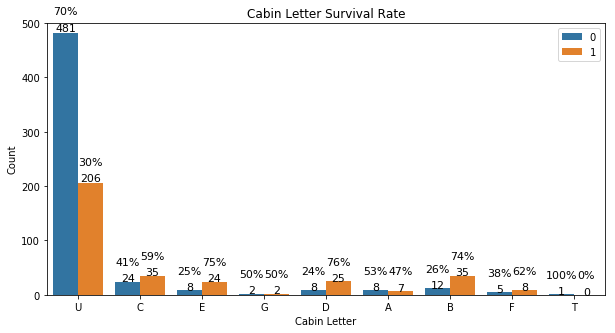

In [45]:
# Return the counts of each unique value in the Cabin column
print(train['Cabin'].value_counts())
fig = plt.figure(figsize = (10,5))

# Plot a graph of these values
ax = plt.plot()
ax = sns.countplot(x = 'Cabin', hue = 'Survived',data = train)
ax.set_title('Cabin Letter Survival Rate')
ax.set_ylim(0,500)
ax.set_xlabel('Cabin Letter')
ax.set_ylabel('Count')
ax.legend(loc = 1)

# Insert data labels onto graph
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax.patches): 
    ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 30,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=11)
    ax.text(p.get_x()+p.get_width()/2, height[i]*1.01,
           '{:.0f}'.format(height[i]), ha="center", size=11)

As previously seen, there is an overwelhming majority of unknown Cabins in the train dataset. Based on this, the best option here might be to create two groups: known and unknown. This will avoid over-fitting on the sparse data by cabin level, and is what will be completed next with the help of a new function.

In [46]:
# New function to classify known cabins as 'Known', otherwise 'Unknown'
def unknown_cabin(cabin):
    if cabin != 'U':
        return 1
    else:
        return 0
    
# Applying new function to Cabin feature
train['Cabin'] = train['Cabin'].apply(lambda x:unknown_cabin(x))
test['Cabin'] = test['Cabin'].apply(lambda x:unknown_cabin(x))

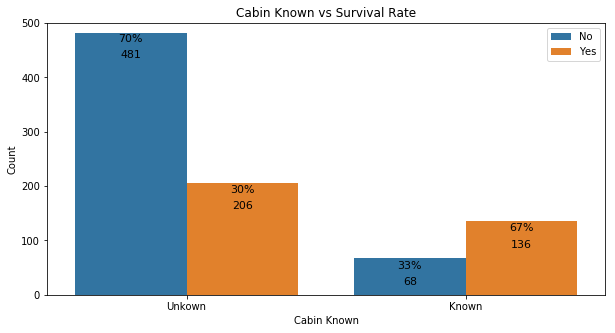

In [47]:
# Plotting Cabin feature in its new form
fig = plt.figure(figsize = (10,5))

ax = plt.plot()
ax = sns.countplot(x = 'Cabin',hue = 'Survived', data = train)
ax.set_title('Cabin Known vs Survival Rate')
ax.set_ylim(0,500)
ax.set_xlabel('Cabin Known')
ax.set_xticklabels(['Unkown','Known'])
ax.set_ylabel('Count')
ax.legend(['No','Yes'],loc = 1)
    
# Adding in data labels
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax.patches): 
    ax.text(p.get_x()+p.get_width()/2, height[i]*1.01-20,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=11)
    ax.text(p.get_x()+p.get_width()/2, height[i]*1.01- 50,
           '{:.0f}'.format(height[i]), ha="center", size=11)

### ii: Age

Age doesn't have nearly as many missing values as Cabin did, so there should be more options available, hopefully including imputation of these missing values. Let's recap how many missing values exist within each dataset.

In [48]:
# Returning NaN within Age across Train & Test set
print('Train: ',pd.isnull(train['Age']).sum(),' Test: ', pd.isnull(test['Age']).sum())

Train:  177  Test:  86


Given that we have Pclass and have now created a new feature for Title, we can impute Age using each of these as they should be quite indicative of an individuals age. It should be a more accurate method than simply computing random integers around the mean or median of age. Let's do this now.

In [49]:
# Gathering the value counts of Title and Pclass
print('Titles:', '\n', train['Title'].value_counts())
print('\n') 
print('Pclass:', '\n',train['Pclass'].value_counts())

Titles: 
 0    531
1    185
2    135
3     40
Name: Title, dtype: int64


Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


Imputing can either be completed by the Mean or Median. Let's use the below information to help decide on which might be most accurate.

In [50]:
# Check which statistic to use in imputation
print(train['Age'].describe(exclude='NaN'))

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


The mean and percentile breakdown indicates multiple features converging around the 30 mark, which perhaps isn't surprising. Based on this it may be better to proceed with imputing with the median (middle) value.

In [51]:
# Imputing Age within the train & test set with the Median, grouped by Pclass and title
train['Age'] = train.groupby(['Pclass','Title'])['Age'].apply(lambda x: x.fillna(x.median()))
test['Age'] = test.groupby(['Pclass','Title'])['Age'].apply(lambda x: x.fillna(x.median()))

In [52]:
# A check to confirm no more NaN values within Age
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Title       0
dtype: int64

In [53]:
# Comparing descriptive statistics now that Age has been computed
print(train['Age'].describe())

count    891.000000
mean      29.201089
std       13.547237
min        0.420000
25%       21.000000
50%       26.000000
75%       36.750000
max       80.000000
Name: Age, dtype: float64


Comparing descriptives before and after imputation reveals only nuanced changes in values, which is a encouraging result. Lastly, Age should be converted from a float to an int.

In [54]:
# Converting Fare to type int and also fixing the 1 missing value in the test set
data = [train, test]

for d in data:
    d['Age'] = d['Age'].astype(int)

## 4c: Creating new features

### i: SibSp & Parch

It would make sense that these two features were combined into one, so that's what we'll do now. There will be one feature to determine the number of relatives an individual has, and another that will simply specify whether or not that individual travelled alone.

In [55]:
# Creating two features of relatives and not alone
data = [train, test]
for dataset in data:
    dataset['Relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Relatives'] > 0, 'Not_alone'] = 0
    dataset.loc[dataset['Relatives'] == 0, 'Not_alone'] = 1
    dataset['Not_alone'] = dataset['Not_alone'].astype(int)

In [56]:
# Counting the values of the new feature Relatives
train['Relatives'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Relatives, dtype: int64

In [57]:
# Counting the values of the new feature Not_alone
train['Not_alone'].value_counts()

1    537
0    354
Name: Not_alone, dtype: int64

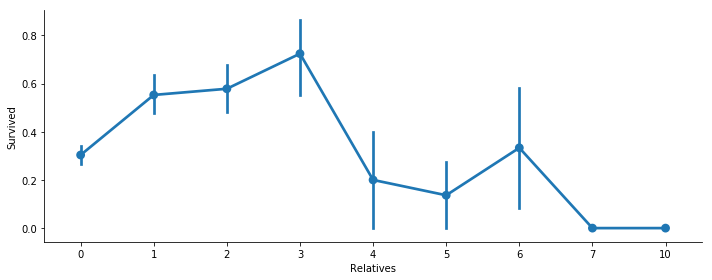

In [58]:
# Plotting relatives vs survived for a final look at the new combined feature
axes = sns.factorplot('Relatives','Survived', 
                      data=train, aspect = 2.5, )

With the new features created, the last action is to drop the old features SibSp & Parch from both datasets.

In [59]:
# Dropping SibSp & Parch from both datasets
train = train.drop(['SibSp'], axis=1)
test = test.drop(['SibSp'], axis=1)
train = train.drop(['Parch'], axis=1)
test = test.drop(['Parch'], axis=1)

## 4d: A final look

With Data Preprocessing now complete, let's take one final look at the overall new data structure before we progress with building machine learning algorithms.

In [60]:
# Information about the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null int64
Fare         891 non-null int64
Cabin        891 non-null int64
Embarked     891 non-null int64
Title        891 non-null int64
Relatives    891 non-null int64
Not_alone    891 non-null int64
dtypes: int64(10)
memory usage: 69.7 KB


No missing values and all integers. Lovely stuff!

In [61]:
# First 10 rows of the train dataset
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Relatives,Not_alone
0,0,3,0,22,7,0,0,0,1,0
1,1,1,1,38,71,1,1,2,1,0
2,1,3,1,26,7,0,0,1,0,1
3,1,1,1,35,53,1,0,2,1,0
4,0,3,0,35,8,0,0,0,0,1
5,0,3,0,26,8,0,2,0,0,1
6,0,1,0,54,51,1,0,0,0,1
7,0,3,0,2,21,0,0,3,4,0
8,1,3,1,27,11,0,0,2,2,0
9,1,2,1,14,30,0,1,2,1,0


Everything looks in good shape for the machine learning to commence. One final consideration is around the scales for Age and Fare. For many machine learning algorithms to work best, it is required that scales are normalised in some way, for example, to prevent compromising of algorithms that work on the basis of Euclidean distance (e.g. KNN). This will be tackled within the pipeline of the machine learning algorithm with the help of a scaler.

# Step 5: Machine Learning models

Within this step some suitable machine learning algorithms will be fitted to the training data in turn, to see which is best at intially predicting the target variable of survival. First of all, the x and y variables will be set-up so that one contains all of the features, and the other the target variable ('Survived').

In [62]:
# Set up feature and target variables in train set, and remove Passenger ID from test set
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()

Now that feature and target variables have been established, we can build some initial machine learning models. This will be completed with the aid of a pipeline, which sequentially applies a list of transforms with a final estimator. The transformation that will be applied in this case is the StandardScaler, which will correct for scales (e.g. age/fare) having significantly different ranges than others. Lastly, since this is a classification problem ('Survived' is binary) we will only be dealing with machine learning algorithms of this nature.

## 5a: K nearest neighbour

In [63]:
# Build the pipeline
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 3))]
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
knn_scaled_fit = pipeline.fit(X_train, y_train)

# Predict using the test data
knn_scaled_predict = pipeline.predict(X_test)

# Compute and predict model accuracy
acc_knn = round(pipeline.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")

87.65 %


In [64]:
# Testing the same algorithm, but on an unstandardised dataset
knn = KNeighborsClassifier(n_neighbors = 3)
knn_unscaled_fit = knn.fit(X_train, y_train)
knn_unscaled_predict = knn.predict(X_test)
acc_knn2 = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn2,2,), "%")

84.51 %


The second analysis was run to confirm that standardising the data via a pipeline contributes towards a more accurate model, which it does. For each model, I will fit it to the data with and without applying the Standard Scaler so that we can be sure in each case to obtain the best prediction. For some models (e.g. Decision Tree) standardisation is not required but I will perform both analyses in each case still to prove this is the case.

## 5b: Logistic Regression

In [65]:
# Build the pipeline
steps = [('scaler', StandardScaler()), ('log', LogisticRegression())]
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
log_scaled_fit = pipeline.fit(X_train, y_train)

# Predict using the test data
log_scaled_predict = pipeline.predict(X_test)

# Compute and predict model accuracy
acc_log = round(pipeline.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

83.28 %


In [66]:
# Testing the same algorithm, but on an unstandardised dataset
log = LogisticRegression()
log_unscaled_fit = log.fit(X_train, y_train)
log_unscaled_predict = log.predict(X_test)
acc_log2 = round(log.score(X_train, y_train) * 100, 2)
print(round(acc_log2,2,), "%")

83.61 %


## 5c: Random Forest

In [93]:
# Build the pipeline
steps = [('scaler', StandardScaler()), ('ran', RandomForestClassifier(n_estimators=100))]
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
ran_scaled_fit = pipeline.fit(X_train, y_train)

# Predict using the test data
ran_scaled_predict = pipeline.predict(X_test)

# Compute and predict model accuracy
acc_ran = round(pipeline.score(X_train, y_train) * 100, 2)
print(round(acc_ran,2,), "%")

96.97 %


In [68]:
# Testing the same algorithm, but on an unstandardised dataset
ran = RandomForestClassifier(n_estimators=100)
ran_unscaled_fit = ran.fit(X_train, y_train)
ran_unscaled_predict = ran.predict(X_test)
acc_ran2 = round(ran.score(X_train, y_train) * 100, 2)
print(round(acc_ran2,2,), "%")

96.97 %


## 5d: Support Vector Classifier

In [69]:
# Build the pipeline
steps = [('scaler', StandardScaler()), ('svc', SVC())]
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
svc_scaled_fit = pipeline.fit(X_train, y_train)

# Predict using the test data
svc_scaled_predict = pipeline.predict(X_test)

# Compute and predict model accuracy
acc_svc = round(pipeline.score(X_train, y_train) * 100, 2)
print(round(acc_svc,2,), "%")

84.74 %


In [70]:
# Testing the same algorithm, but on an unstandardised dataset
svc = SVC()
svc_unscaled_fit = svc.fit(X_train, y_train)
svc_unscaled_predict = svc.predict(X_test)
acc_svc2 = round(svc.score(X_train, y_train) * 100, 2)
print(round(acc_svc2,2,), "%")

90.68 %


## 5e: Decision Tree

In [71]:
# Build the pipeline
steps = [('scaler', StandardScaler()), ('tree', DecisionTreeClassifier())]
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
tree_scaled_fit = pipeline.fit(X_train, y_train)

# Predict using the test data
tree_scaled_predict = pipeline.predict(X_test)

# Compute and predict model accuracy
acc_tree = round(pipeline.score(X_train, y_train) * 100, 2)
print(round(acc_tree,2,), "%")

96.97 %


In [72]:
# Testing the same algorithm, but on an unstandardised dataset
tree = DecisionTreeClassifier()
tree_unscaled_fit = tree.fit(X_train, y_train)
tree_unscaled_predict = tree.predict(X_test)
acc_tree2 = round(tree.score(X_train, y_train) * 100, 2)
print(round(acc_tree2,2,), "%")

96.97 %


With five models now fit to the training data, let's tally up and see which one was best at predicting survival on the Titanic.

In [94]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'SVC', 
              'Decision Tree'],
    'Score': [acc_knn, acc_log2, 
              acc_ran, acc_svc2, acc_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
96.97,Random Forest
96.97,Decision Tree
90.68,SVC
87.65,KNN
83.61,Logistic Regression


## 5f: The most accurate algorithm: Random Forest

In first place is the Random Forest classifier, although it is tied in score with the Decision Tree algorithm. As I want to proceed with just a single algorithm in this project, I will select Random Forest model. Before exploring this model further and fine-tunings in it's performance on the dataset, let's understand more about what a Random Forest is, and how it works.

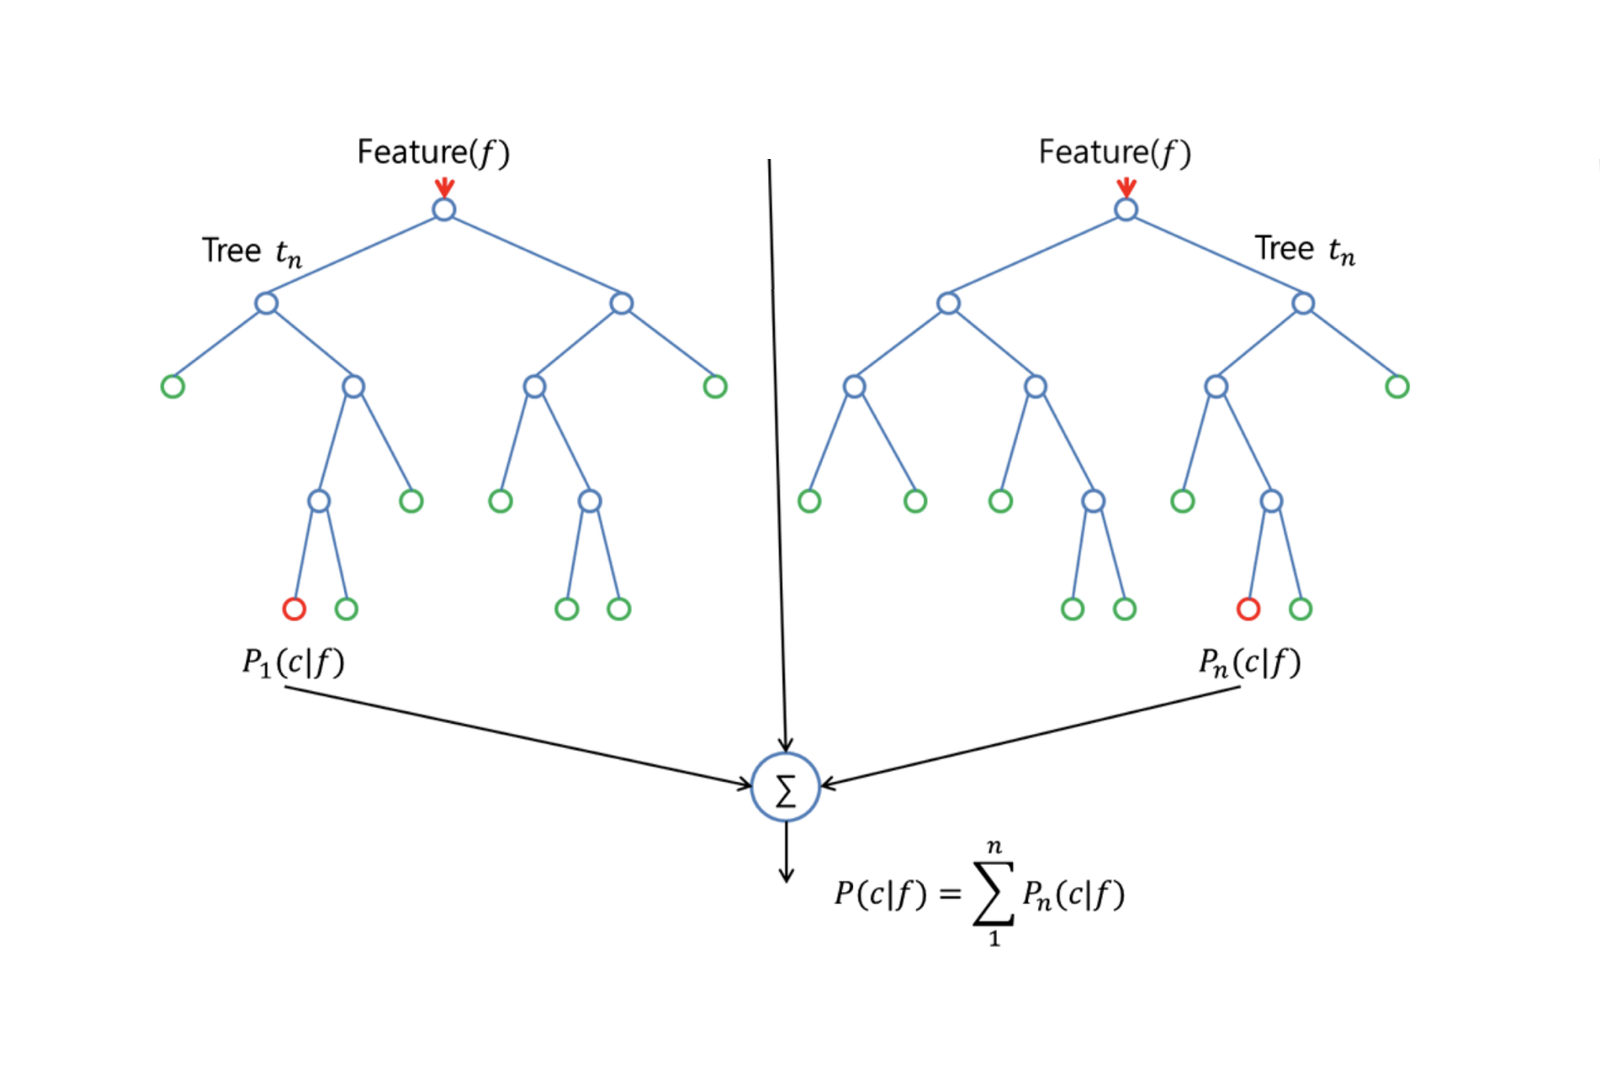

In [74]:
# Inserting k-folds cross validation image
Image(filename='/Users/josh24990/Documents/Personal Development/3. Data Science/Python/Random forest algorithm.PNG')

Above is an example of a Random Forest containing two 'trees'. Random forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing multiple decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

The training algorithm for random forests applies the general technique of bootstrap aggregating, or bagging, to tree learners. Given a training set X = x1, ..., xn with responses Y = y1, ..., yn, bagging repeatedly (B times) selects a random sample with replacement of the training set and fits trees to these samples:

 - For b = 1, ..., B:
 - Sample, with replacement, n training examples from X, Y; call these Xb, Yb.
 - Train a classification or regression tree fb on Xb, Yb.
 
After training, predictions for unseen samples 'x' can be made by averaging the predictions from all the individual regression trees on 'x', or by taking the majority vote in the case of classification trees.

This bootstrapping procedure leads to better model performance because it decreases the variance of the model, without increasing the bias. This means that while the predictions of a single tree are highly sensitive to noise in its training set, the average of many trees is not, as long as the trees are not correlated. Simply training many trees on a single training set would give strongly correlated trees (or even the same tree many times, if the training algorithm is deterministic); bootstrap sampling is a way of de-correlating the trees by showing them different training sets.

As this is a classification problem, the Random Forest algorithm will be looking for the class that is the mode of the classes, as described above.

## 5g: K folds cross validation on Random Forest model

To this point, a model performance is dependent on the way the data has been split between training and test data. This isn't representative of the model's ability to generalise, therefore to achieve this we can perform K folds cross validation. This technique works via the following steps: <br>
1. Randomly split your entire dataset into k”folds”. <br>
2. For each k folds in your dataset, build your model on k – 1 folds of the data set. Then, test the model to check the effectiveness for kth fold. <br>
3. Record the error you see on each of the predictions. <br>
4. Repeat this until each of the k folds has served as the test set. <br>
5. The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model.

The below image is a visual representation of what i've just described:

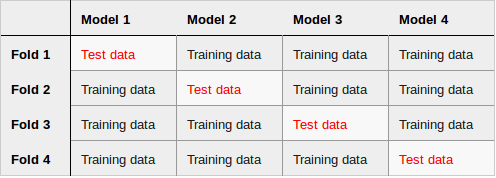

In [75]:
# Inserting k-folds cross validation image
Image(filename='/Users/josh24990/Documents/Personal Development/3. Data Science/Python/k-folds cross validation.PNG')

We will now perform the k-folds cross validation:

In [76]:
# Calculating the k fold cross validation
Random_Forest = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(Random_Forest, X_train, y_train, cv=10, scoring = "accuracy")

In [77]:
# Printing scores and summary statistics
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76666667 0.81111111 0.73033708 0.83146067 0.86516854 0.85393258
 0.82022472 0.76404494 0.86516854 0.84090909]
Mean: 0.8149023947338554
Standard Deviation: 0.0443107329783227


K fold cross validation reveals a mean model accuracy of <b>81%</b>, which could vary either way by around <b>4%</b>, as denoted by the Standard Deviation figure. This provides something to now build upon when next attempting to fine tune the performance of the Random Forest model.

# Step 6: Assessing feature importance

Feature importance within a Random Forest model can be assessed by looking at how much the tree nodes (that use that feature) reduce impurity on average (across all trees in the forest). This score can be computed automatically for each feature after training, and the results are then scaled so that the sum of all importances sums to 1. These importances will be computed with the below code:

In [78]:
# Building feature importance into a DataFrame
Importance = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(ran.feature_importances_,3)})
Importance = Importance.sort_values('Importance',ascending=False).set_index('Feature')

#Printing DataFrame
Importance.head(9)

,Importance
Feature,
Age,0.250
Title,0.218
Fare,0.187
Sex,0.117
Pclass,0.074
Relatives,0.071
Cabin,0.039
Embarked,0.033
Not_alone,0.010


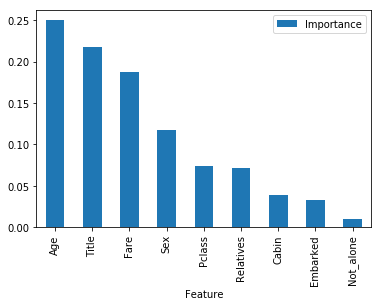

In [79]:
#Displaying this information graphically
Importance.plot.bar()

Assessing feature importance reveals that Not_alone, Embarked and Cabin are adding little value to the current model. These will therefore next be dropped from the dataset.

In [80]:
# Dropping obselete features from the datasets
train = train.drop("Not_alone", axis=1)
test = test.drop("Not_alone", axis=1)

train = train.drop("Embarked", axis=1)
test = test.drop("Embarked", axis=1)

train = train.drop("Cabin", axis=1)
test = test.drop("Cabin", axis=1)

With these features removed, let's next re-test the Random Forest's model accuracy. As a general rule of thumb, it is better to remove features that do not contribute to the model's accuracy as otherwise the model could begin to suffer from being overfit.

In [81]:
# Build the pipeline
steps = [('scaler', StandardScaler()), ('ran', RandomForestClassifier(n_estimators=100))]
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
ran_scaled_fit = pipeline.fit(X_train, y_train)

# Predict using the test data
ran_scaled_predict = pipeline.predict(X_test)

# Compute and predict model accuracy
acc_ran = round(pipeline.score(X_train, y_train) * 100, 2)
print(round(acc_ran,2,), "%")

96.97 %


The prediction score is the same as before, indicating that these features did add any value to the original model accuracy. Next, we can begin Hyperparameter tuning on the Random Forest parameters to fine tine the model and hopefully improve this accuracy score.

# Step 7: Hyperparameter Tuning

With each machine learning algorithm comes a number of parameters that together can be fine tuned to produce the most accurate prediction on a given dataset. This is essentially what Hyperparamter tuning is - finding the best parameters for your model. There are principically two ways to achieve this, either through a full GridSearchCV or a RandomizedSearchCV. GridSearchCV, which searches over the entire space of parameters specified, can be computationally expensive, especially if you are dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings are sampled from specified probability distributions. This is what we will use next on our Random Forest model. There are a few steps to achieve this, including creation of a new function to allow for reporting of the best scores outputed by the RandomizedSearchCV. The steps in code are displayed below.

In [82]:
# Build a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)


# A new function to allowing reporting of the best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# Specify the parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 9),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Performed the RandomizedSearchCV
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

# Print the results with the report function
start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 15.00 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.833 (std: 0.008)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.833 (std: 0.008)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 8}

Model with rank: 3
Mean validation score: 0.832 (std: 0.007)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 6, 'min_samples_split': 5}

Model with rank: 3
Mean validation score: 0.832 (std: 0.007)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 7}



Great, we see an increase in model accuracy from our initial K fold cross validation score. With the parameters tuned, prediction can now be <b>83.3%</b> accurate. Let's re-run the Random Forest, specifying the parameters, to prove this:

In [83]:
# Build the pipeline
steps = [('scaler', StandardScaler()), ('ran', RandomForestClassifier(n_estimators=100, 
                                                                      bootstrap=False, 
                                                                      criterion='entropy', 
                                                                      max_depth=3, 
                                                                      max_features=5, 
                                                                      min_samples_leaf=10, 
                                                                      min_samples_split=5))]
                                                                    
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
ran_scaled_fit = pipeline.fit(X_train, y_train)

# Predict using the test data
ran_scaled_predict = pipeline.predict(X_test)

# Compute and predict model accuracy
acc_ran = round(pipeline.score(X_train, y_train) * 100, 2)
print(round(acc_ran,2,), "%")

83.28 %


Now that the optimum parameters are in place, let's run some final evaluative tests on our Random Forest model, before we prepare for submission.

# Step 8: Further Model Evaluation

## 8a: Confusion matrix

The confusion matrix provides a method for quantitatively evaluating model performance. Let's see what it can tell us below.

In [84]:
# Computing the confusion matrix
predictions = cross_val_predict(ran, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[472,  77],
       [ 84, 258]])

The array can be interpreted in the following way:
 - True negatives: 477 passengers correctly identified as not survived
 - False positives: 77 passengers wrongly identified as not survived
 - False negatives: 84 passengers wrongly identified as survived
 - True positives: 258 passengers correctly identified as survived

This provides a good initial flavour of the model's ability to correctly identify each classification. In other words, this tells us more about model accuracy. Next we will consider the model's precision and recall.

## 8b: Precision & recall

Different to accuracy, precision aims to inform the proportion of positive identifications that were actually correct. In other words, how many of the 'Survived' classifications were correct. Recall instead checks for how many actual positives were correctly identified. In other words, how many passengers who actually survived were correctly identified. These statistics will be computed below.

In [85]:
# Computing model precision and recall
print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7701492537313432
Recall: 0.7543859649122807


Overall, the model correctly predicts that a passenger survived <b>77%</b> of the time, e.g. it is 77% precise. It also correctly recalled <b>75%</b> of those passengers who actually survived the Titanic disaster.

## 8c: F1 score

Calculating the harmonic mean of precision and recall (e.g. the F1 score) can provide another useful accuracy measurement.

In [86]:
# Calculating the F1 score
f1_score(y_train, predictions)

0.7621861152141802

The f1 score measures the model's performance at approximately <b>76%</b>, which is a satisfactory finding.

## 8d: Precision-Recall curve

For each person the Random Forest algorithm has to classify, it computes a probability based on a function and it classifies the person as survived (when the score is bigger than the <b>threshold</b>) or as not survived (when the score is smaller than the <b>threshold</b>). This information can be displayed visually as a 'Presicion-Recall curve' and can support tailoring an algorithm to more exact precision and recall requirements. We will compute this below:

In [87]:
# Getting prediction probabilities
y_scores = ran.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

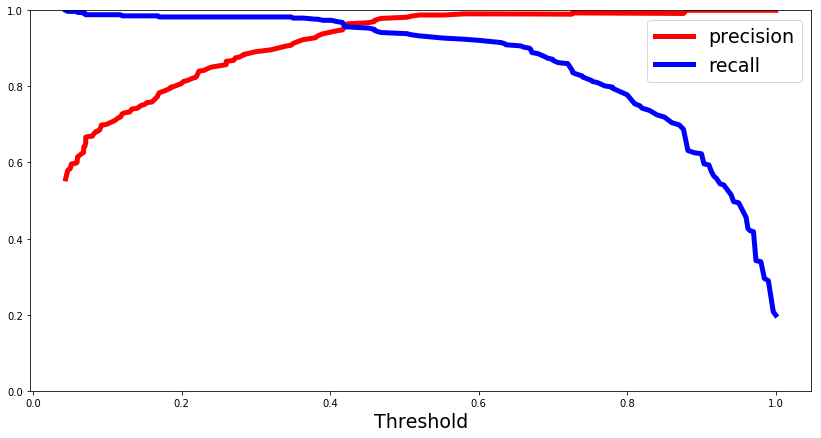

In [88]:
# Defining a new function to plot the precision-recall curve
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("Threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

This visual allows for a threshold to be chosen that provides the best precision/recall tradeoff for a given  machine learning problem. Here, it is visible that after a threshold of 0.6, recall slopes off quite rapidly. Precision on the other hand hits a plateau from a threshold of around 0.5 onwards. 

## 8e: ROC curve

A further method of visual evaluation is to plot an ROC-AUC curve. Rather than plotting precision vs. recall, this curve plots the true positive rate (e.g recall) against the false positive rate (ratio of incorrectly classified negative instances). The area under the ROC curve is known as the AUC. A larger AUC is indicative of a better model. The following code will compute this:

In [89]:
# Compute the true positive and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

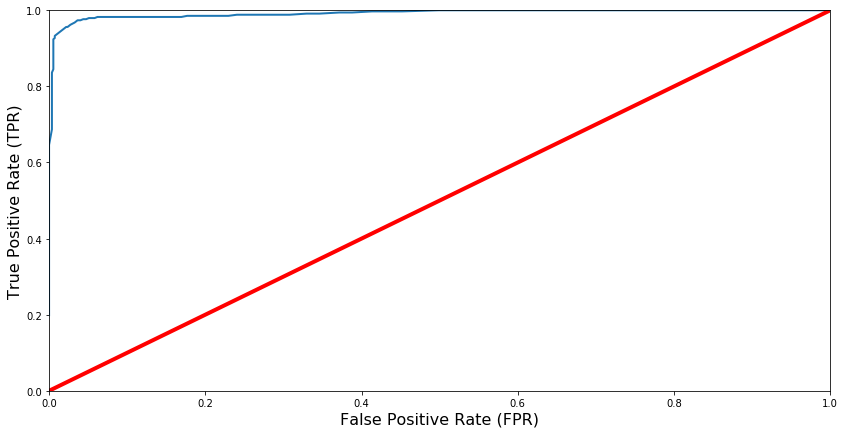

In [90]:
# Plotting the true positive and false positive rate
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line represents a purely random classifier (e.g a coin flip) and therefore the aim is for our classifier to be as far away from it as possible. For our Random Forest model, this is therefore a strong finding.

## 8f: ROC-AUC score

Lastly, we will compute the size of this AUC space, known as the ROC-AUC score.

In [91]:
# Computing the ROC-AUC score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9918112676956508


Well, I am very happy with that! A classifier which is 100% correct would achieve a score of 1.0, so for our model to score at <b>99.1%</b> is a very promising result, and one that I think is ready for submission to the Kaggle leaderboards.

# Step 9: Submission

In [92]:
# Preparing the dataset for submission
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": ran_scaled_predict})
submission.to_csv('submission.csv', index=False)

# Step 10: Summary

And there we have it! A strong result at the end where from an initial range of unprocessed features we have been able to predict something quite meaningful, fine tuned to achieve 83% accuracy. That is, whether or not passengers would have survived when the Titanic sank in 1912. I have learned a tremendous amount in completing this project and hope to carry many of the new skills I have picked up with me into future projects. That is not to say however that is project could not have been strengthened, indeed, there would be several areas for further development. These include introducing 'Out-of-the-bag' scoring, or a more extensive approach to hyperparameter tuning (more parameters across more models). The data preprocessing stage might have also made more effective use out of the existing features, or perhaps more strongly considered noisy features. An introduction of ensemble learning at model building stage may have also yielded a more accurate final model. 

Anyway, I hope that you have enjoyed reading and working through this project with me. Please do feel free to share any feedback that you might have on any aspect, whether it be good, bad or ugly! Thank you again for reading. 